# Hugging Face Agents
* [HF tutorial](https://huggingface.co/docs/transformers/transformers_agents)

* [HF Notebook](https://colab.research.google.com/drive/1c7MHD-T1forUPGcC_jlwsIptOzpG3hSj#scrollTo=P4SPw04cT9Y1)


In [1]:
#@title Setup
transformers_version = "v4.29.0" #@param ["main", "v4.29.0"] {allow-input: true}

print(f"Setting up everything with transformers version {transformers_version}")

#%pip install git+https://github.com/huggingface/transformers@$transformers_version -q diffusers accelerate datasets torch soundfile sentencepiece opencv-python openai

import IPython
import soundfile as sf

def play_audio(audio):
    sf.write("speech_converted.wav", audio.numpy(), samplerate=16000)
    return IPython.display.Audio("speech_converted.wav")



Setting up everything with transformers version v4.29.0


In [2]:
from transformers import OpenAiAgent
import os
from dotenv import load_dotenv
from PIL import Image


load_dotenv()


OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
HF_AUTH_TOKEN = os.getenv("HF_AUTH_TOKEN")

agent = OpenAiAgent(model="text-davinci-003", api_key=OPENAI_API_KEY)

In [ ]:
from huggingface_hub import login

login(HF_AUTH_TOKEN)

In [3]:
from transformers import HfAgent

# Starcoder
agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")
# StarcoderBase
# agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoderbase")
# OpenAssistant
# agent = HfAgent(url_endpoint="https://api-inference.huggingface.co/models/OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5")

==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image according to the prompt.


==Code generated by the agent==
image = image_generator(prompt="Draw me a picture of rivers and lakes.")


==Result==


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 25/25 [00:24<00:00,  1.00it/s]


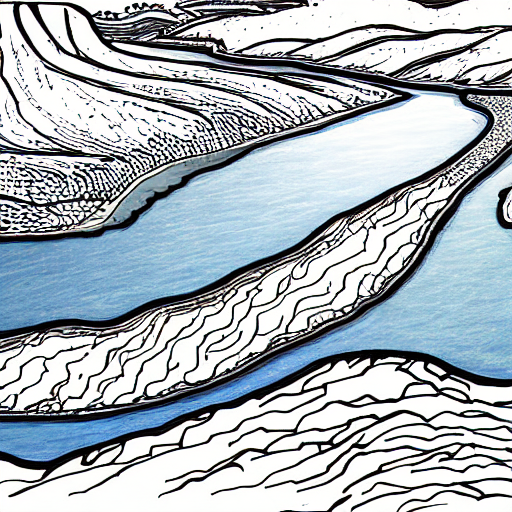

In [7]:
agent.run("Draw me a picture of rivers and lakes.")

==Explanation from the agent==
I will use the tool `image_generator` to generate a picture of rivers and lakes.


==Code generated by the agent==
image = image_generator(prompt="rivers and lakes")


==Result==


100%|██████████| 25/25 [00:19<00:00,  1.30it/s]


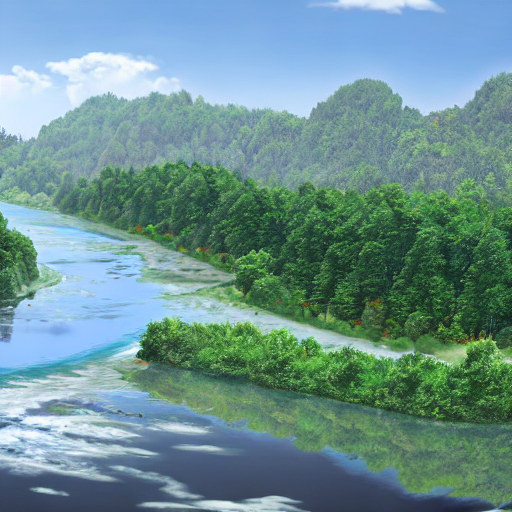

In [8]:
agent.chat("Generate a picture of rivers and lakes")

==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image according to the prompt.


==Code generated by the agent==
image = image_generator(prompt="Draw me a picture of a tiger with a sword.")


==Result==


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/25 [00:00<?, ?it/s]

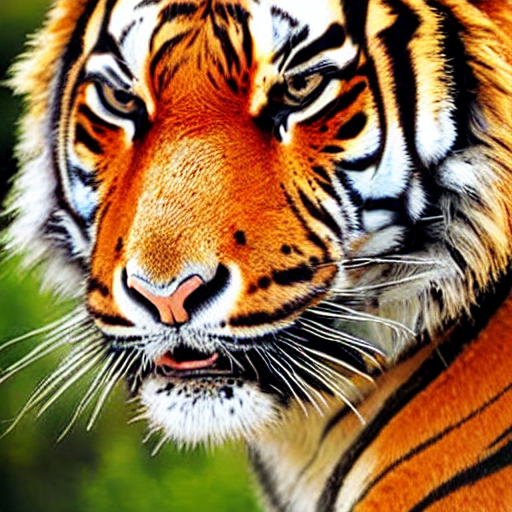

In [3]:
tiger = agent.run("Draw me a picture of a tiger with a sword.")
tiger

In [4]:
tiger2 = agent.run("Change the background into a volcanic eruption.", picture=tiger)
tiger2

==Explanation from the agent==
I will use the following  tool: `image_transformer` to transform the image according to the prompt.


==Code generated by the agent==
image = image_transformer(image, prompt="volcanic eruption")


==Result==
Evaluation of the code stopped at line 0 before the end because of the following error:
The variable `image` is not defined.


==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image according to the prompt.


==Code generated by the agent==
image = image_generator(prompt)


==Result==


  0%|          | 0/25 [00:00<?, ?it/s]

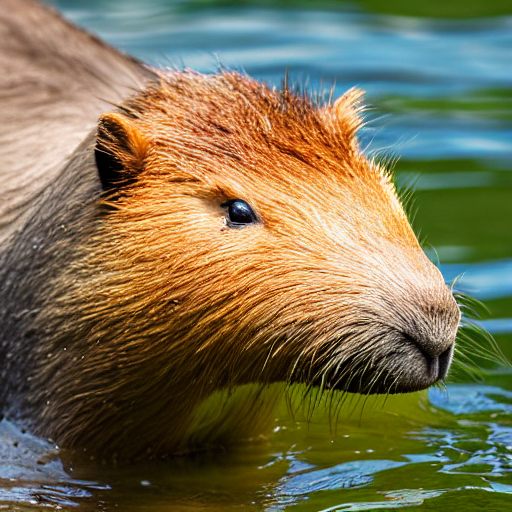

In [5]:
agent.run("Draw me a picture of the `prompt`", prompt="a capybara swimming in the sea")

### Image captioning

==Explanation from the agent==
I will use the following  tools: `image_captioner` to generate a caption for the image, then `image_transformer` to transform the image according to the caption.


==Code generated by the agent==
caption = image_captioner(image)
print(f"The caption is {caption}.")
transformed_image = image_transformer(image, prompt=caption)


==Result==
The caption is a monkey wearing a sweater and tie.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

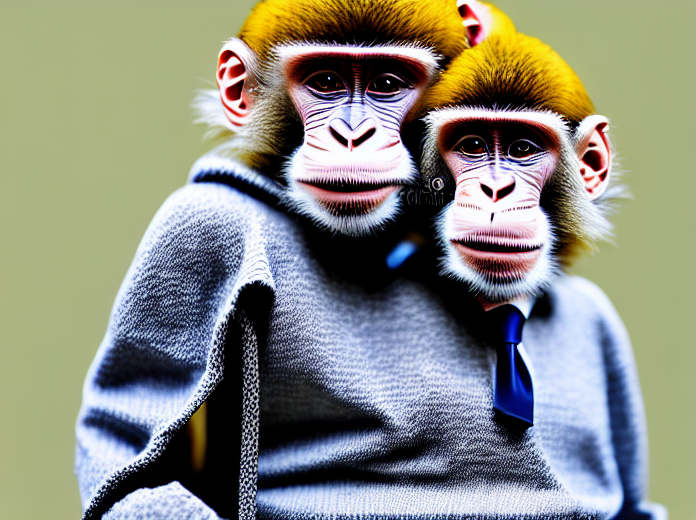

In [12]:
# Need to make the image a PIL image
agent.run("Caption the following image and draw an image similar to it", image=Image.open(os.path.join("images", "classy_chimp.jpg")))